# Daily Update of COVID-19 in Central Sulawesi

Data is taken from [banuacoders.com](banuacododers.com/api/pico). This website collect a static data from local government website and publish it as a JSON file.

The data then processed here and uploaded to Instagram @[sultenglawancovid](https://www.instagram.com/sultenglawancovid/) (Central Sulawesi Versus COVID).

In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

#plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
import matplotlib.dates as mdates

#math operation
import numpy as np

#import file from internet
import json
import urllib.request

#Library to plot choropleth
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

#make images
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

## COVID-19 Spread in Central Sulawesi

Shows COVID-19 spread in Central Sulawesi as a choropleth by, using `geopandas` and `geoplot` libraries

### Get data from website

In [2]:
url_kab_kota = "https://banuacoders.com/api/pico/kabupaten"
data_kab_kota = urllib.request.urlopen(url_kab_kota).read().decode()
dict_kab_kota = json.loads(data_kab_kota)

polygon_raw_json = open('../JSON/smooth01.json');
dict_map = json.load(polygon_raw_json);

before_palu = 5;
after_palu = 6;
finished = 13;

for i in range(before_palu):
    dict_map['features'][i]['properties']['ODP'] = dict_kab_kota['data'][i]['ODP']
    dict_map['features'][i]['properties']['PDP'] = dict_kab_kota['data'][i]['PDP']
    dict_map['features'][i]['properties']['positif'] = dict_kab_kota['data'][i]['positif']
    
for i in range(after_palu, finished, 1):
    dict_map['features'][i]['properties']['ODP'] = dict_kab_kota['data'][i-1]['ODP']
    dict_map['features'][i]['properties']['PDP'] = dict_kab_kota['data'][i-1]['PDP']
    dict_map['features'][i]['properties']['positif'] = dict_kab_kota['data'][i-1]['positif']

dict_map['features'][5]['properties']['ODP'] = dict_kab_kota['data'][12]['ODP']
dict_map['features'][5]['properties']['PDP'] = dict_kab_kota['data'][12]['PDP']
dict_map['features'][5]['properties']['positif'] = dict_kab_kota['data'][12]['positif']
    
with open('../JSON/covid19sulteng.json', 'w') as outfile:
    json.dump(dict_map, outfile)

### Create Chropleth

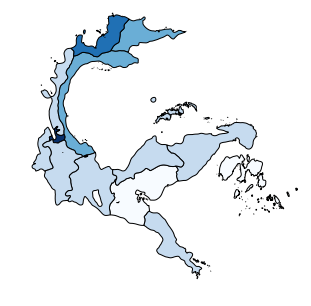

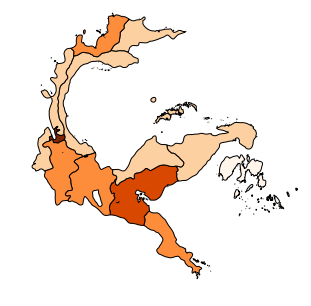

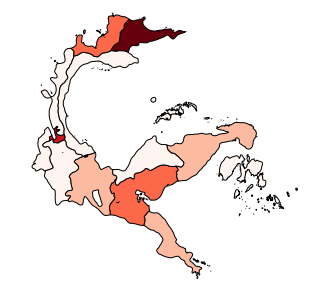

In [3]:
data = gpd.read_file('../JSON/covid19sulteng.json')
polygon_sulteng = gpd.read_file('../JSON/covid19sulteng.json')

gplt.choropleth(
    polygon_sulteng, hue='ODP', 
    edgecolor='black', linewidth=1,
    cmap='Blues', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

gplt.choropleth(
    polygon_sulteng, hue='PDP', 
    edgecolor='black', linewidth=1,
    cmap='Oranges', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

gplt.choropleth(
    polygon_sulteng, hue='positif', 
    edgecolor='black', linewidth=1,
    cmap='Reds', legend=False,
    scheme='FisherJenks',
    figsize=(5, 5))

## COVID-19 Trend in Central Sulawesi

Display COVID-19 trend in Central Sulawesi using `Panda` and `PIL` library

### Get data from website

In [27]:
url_statistik = "https://banuacoders.com/api/pico/statistik"
json_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(json_statistik)

nbOfDays = len(dict_statistik['data'])
statistik_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

for i in range(nbOfDays):
    total_positive.append(statistik_data[i]['cumulative_positive'])
    total_recovered.append(statistik_data[i]['cumulative_recovered'])
    total_death.append(statistik_data[i]['cumulative_death'])
    total_rawat.append(statistik_data[i]['cumulative_positive']-statistik_data[i]['cumulative_death']-statistik_data[i]['cumulative_recovered'])
    
    daily_positive.append(statistik_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = statistik_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])



### Add data in case off the website is not updated

In [ ]:
def add_extra(positive, recovered, death, daily_positive_input, date_with_year):
    positive_add = positive
    recovered_add = recovered
    death_add = death
    total_positive.append(positive_add)
    total_recovered.append(recovered_add)
    total_death.append(death_add)
    total_rawat.append(positive_add-recovered_add-death_add)

    daily_positive.append(daily_positive_input)
    date_with_year = date_with_year
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + date_splitted[1])
    
#add_extra(160, 150, 4, 1, "10 Juni 2020")

### Plot data

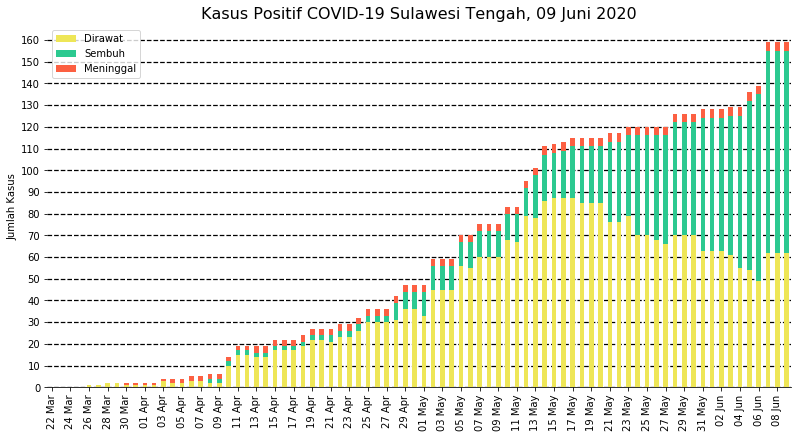

In [36]:
plotdata = pd.DataFrame({
    "Dirawat":total_rawat,
    "Sembuh":total_recovered,
    "Meninggal":total_death
    }, 
    index=np.arange(len(total_rawat))
)

nbOfDays = len(total_rawat)
index=np.arange(nbOfDays)
colors = ['#eee657','#2cc990','#fc6042']
ax = plotdata.plot(kind='bar', stacked=True, color = colors)

new_date = []
for i in range(0, nbOfDays, 2):
    new_date.append(date[i])
    
plt.title('Kasus Positif COVID-19 Sulawesi Tengah, ' + date_splitted[0] + " Juni " + date_splitted[2], fontsize=16, y = 1)
plt.xticks(range(0, len(index), 2), new_date, rotation=90)
plt.yticks(range(0, 170, 10), range(0, 170, 10))
plt.ylabel('Jumlah Kasus')

#ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#xint = range(0, nbOfDays, 2)
#matplotlib.pyplot.xticks(xint)

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
ax.set_axisbelow(True)
matplotlib.pyplot.grid(b=None, which='major', axis='y', color='k', linestyle='--', linewidth=1.25)
plt.savefig('Images/KasusPositif.png', dpi=300, transparent=True)

### Save image for Instagram post

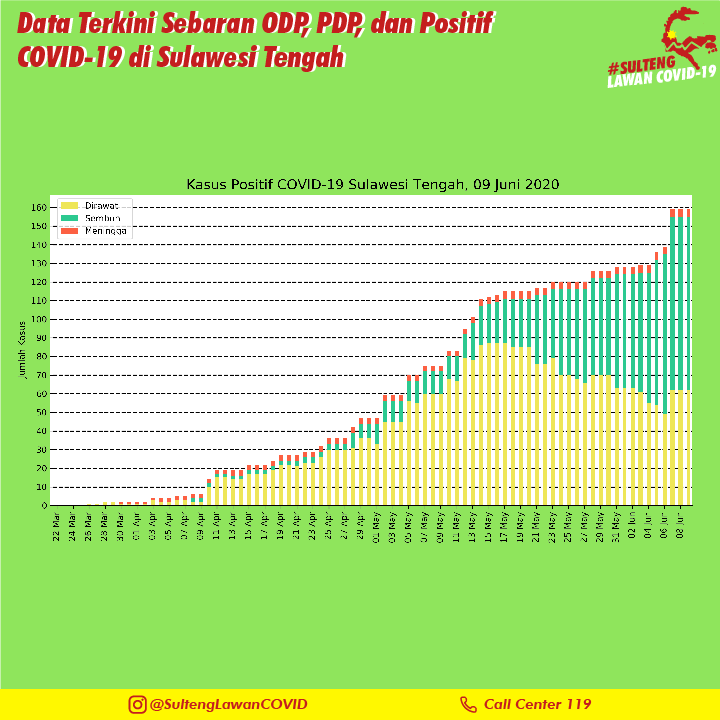

In [37]:
im1 = Image.open('../Images/Artboard6Background.png')
im2 = Image.open('../Images/KasusPositif.png')
white_background = Image.open("../Images/WhiteBackground.png")


im2_w_goal = 825
divider = im2.width/im2_w_goal
im2_x_off = -50
im2_y_off = 145
im2_w = int(im2.width / divider)
im2_h = int(im2.height / divider)
im_resized = im2.resize((im2_w, im2_h))

white_background_x_off = 50
white_background_y_off = 195
white_background_w = 642
white_background_h = 310
white_background = white_background.resize((white_background_w, white_background_h))

back_im = im1.copy()
back_im.paste(white_background, (white_background_x_off, white_background_y_off))
back_im.paste(im_resized, (im2_x_off, im2_y_off), mask=im_resized)
back_im.save('../Images/Slide3.png', quality=100)
display(back_im)

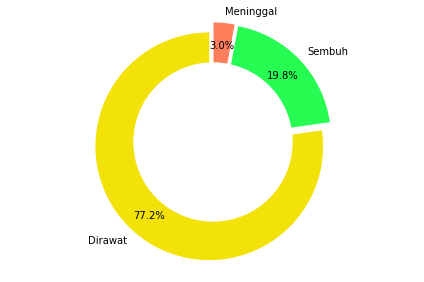

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dirawat', 'Sembuh', 'Meninggal'
sizes = [78, 20, 3]
explode = (0.05, 0.05 ,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ['#f2e207','#26fc51','#ff7f5c']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
#img = Image.open("test1.jpg")
#draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
#font = ImageFont.truetype("arial.ttf", 42)
# draw.text((x, y),"Sample Text",(r,g,b))
#draw.text((0, 0),"Sample Text",(0,0,0),font=font)
#img.save('sample-out.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'test1.jpg'